In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors

import matplotlib.gridspec as gridspec
import statsmodels.tsa.stattools as smt

import iris
import iris.plot as iplt
iris.FUTURE.netcdf_promote=True
import iris.coord_categorisation
from eofs.iris import Eof
from iris.analysis import stats

from matplotlib.patches import FancyArrowPatch

## Upload data

In [2]:
# Upload observed
file_obs = ('/nfs/see-fs-01_users/mlzp121/ee22kvcs/NOAAERSSTv5_1870_2018_monthly_sst_no_annual_cycle_detrended_regridded.nc')
sst_obs = iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')
cube_obs = iris.load_cube(file_obs,sst_obs)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


In [3]:
#Define constraints to make cubes for SST variables
constraints = [iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'TS'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'THO'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'temp'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')]

In [4]:
# Upload Eoi400 simulations (MP)
path = '/nfs/hera1/ee22kvcs/'
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']
names_models_mp = ['0-200_timeseries_CCSM4Utr','501-1099_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2001-2501_timeseries_HadCM3','1850-2049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '1001-1200_timeseries_NorESML']
MP_models = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube(path+'EOI400.SST.'+names_models_mp[i]+'_no_ann_cycle.nc', constraints[i])
    if i == 2:
        uploaded_cubes = uploaded_cubes[:, 0, :, :]
    else:
        uploaded_cubes = uploaded_cubes
    MP_models.append(uploaded_cubes)

#print(MP_models)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdty

In [5]:
# Upload E280 simulations (PI)
path = '/nfs/hera1/ee22kvcs/'
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']
names_models_pi = ['0-200_timeseries_CCSM4Utr','501-806_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2411-2911_timeseries_HadCM3','2850-3049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '0-200_timeseries_NorESML']
PI_models = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube(path+'E280.SST.'+names_models_pi[i]+'_no_ann_cycle.nc', constraints[i])
    if i == 2:
        uploaded_cubes = uploaded_cubes[:, 0, :, :]
    else:
        uploaded_cubes = uploaded_cubes
    PI_models.append(uploaded_cubes)

#print(PI_models)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdty

## Subset the region

In [6]:
# EL NIÑO 3.4 region
# Delimt the region for the cube
min_lat = -5.0
max_lat = 5.0
min_lon = 120.0
max_lon = 170.0

# Functions to identify latitudes and longitudes we want to subset to
def nino_lat(input):
    return min_lat  <= input <= max_lat 
def nino_lon(input):
    return min_lon  <= input <= max_lon 

nino_con = iris.Constraint(latitude = nino_lat, longitude = nino_lon)

nino_mp_subset = []
for i in MP_models:
    nino_mp_sub = nino_con.extract(i)
    nino_mp_subset.append(nino_mp_sub)
    
nino_pi_subset = []
for j in PI_models:
    nino_pi_sub = nino_con.extract(j)
    nino_pi_subset.append(nino_pi_sub)
    
nino_obs_subset = nino_con.extract(cube_obs)

## Compute the PC1

In [7]:
### Calculate PC1 for El Niño
## MP
pcs_mp_nino = []
for mod in range(np.size(MP_models)):
    if not nino_mp_subset[mod].coord('latitude').has_bounds():
        nino_mp_subset[mod].coord('latitude').guess_bounds()
    if not nino_mp_subset[mod].coord('longitude').has_bounds():
        nino_mp_subset[mod].coord('longitude').guess_bounds()
    solver = Eof(nino_mp_subset[mod], weights='area')
    pcs  = solver.pcs(npcs=1)
    pcs_mp_nino.append(pcs)
    
## PI    
pcs_pi_nino = []
for mod in range(np.size(PI_models)):
    if not nino_pi_subset[mod].coord('latitude').has_bounds():
        nino_pi_subset[mod].coord('latitude').guess_bounds()
    if not nino_pi_subset[mod].coord('longitude').has_bounds():
        nino_pi_subset[mod].coord('longitude').guess_bounds()
    solver = Eof(nino_pi_subset[mod], weights='area')
    pcs  = solver.pcs(npcs=1)
    pcs_pi_nino.append(pcs)
    
## Obs    
if not nino_obs_subset.coord('latitude').has_bounds():
    nino_obs_subset.coord('latitude').guess_bounds()
if not nino_obs_subset.coord('longitude').has_bounds():
    nino_obs_subset.coord('longitude').guess_bounds()        
solver_obsp = Eof(nino_obs_subset, weights='area')
pcs_obsp  = solver_obsp.pcs(npcs=1)

## Amplitudes of ENSO

In [8]:
## Calculate amplitudes
st_dev_mp = []
st_dev_pi = []

for i in range(np.size(MP_models)):
    result_mp = pcs_mp_nino[i].collapsed('time', iris.analysis.STD_DEV)
    result_pi = pcs_pi_nino[i].collapsed('time', iris.analysis.STD_DEV)
    st_dev_mp.append(result_mp)
    st_dev_pi.append(result_pi)
    
st_dev_obs = pcs_obsp.collapsed('time', iris.analysis.STD_DEV)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


In [9]:
### MMM
MMM_MP = sum(st_dev_mp[i].data for i in range(np.size(st_dev_mp))) / 7
MMM_PI = sum(st_dev_pi[i].data for i in range(np.size(st_dev_pi))) / 7
### Concatenate
amp_mp = [st_dev_mp[j].data for j in range(7)] + [MMM_MP]
amp_pi = [st_dev_pi[j].data for j in range(7)] + [MMM_PI]

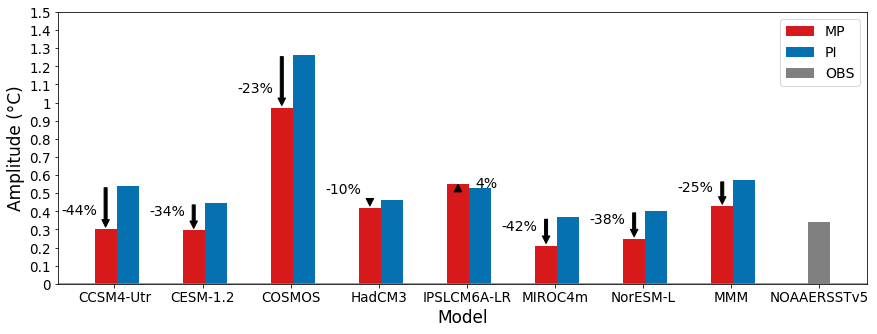

In [10]:
labels = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM']
labels2 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM','NOAAERSSTv5']

fig = plt.figure(figsize=(14.5, 5))
ax1 = fig.add_subplot(1, 1, 1)

# Plot bars
bars_mp = ax1.bar(np.arange(len(labels))+ 0.00, np.array(amp_mp), 0.25, label='MP', color='#D7191C')
bars_pi = ax1.bar(np.arange(len(labels))+ 0.25, np.array(amp_pi), 0.25, label='PI', color='#0571B0')
ax1.bar(8.1, np.array(st_dev_obs.data), 0.25, label='OBS', color='gray')

# Add labels to 'MP' bars
change = (np.array(amp_mp)-np.array(amp_pi))/np.array(amp_pi)*100
labels_mp_str = ["%.f" % x for x in change]
for i, rect in enumerate(bars_mp):
    if i == 4:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 + 0.32, rect.get_height()-0.05),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    else:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 - 0.3, rect.get_height()+0.05),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
# Arrows
for i in range(len(labels)):
    arrow = FancyArrowPatch(
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_pi[i].get_height()),
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_mp[i].get_height()),
        arrowstyle='simple', mutation_scale=15, color='black', linestyle='-'
    )
    ax1.add_patch(arrow)
               
ax1.set_xticks(np.arange(9) + 0.1)
ax1.set_xticklabels(labels2, fontsize=13.5)
ax1.set_yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5])
ax1.set_yticklabels([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5],fontsize=13.5)

ax1.set_xlabel('Model', fontsize=17)
ax1.set_ylabel('Amplitude (°C)', fontsize=17)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1.5)
ax1.legend(fontsize=14)

#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/Amplitude_bars_Nino_PCs_v2.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()